<a href="https://colab.research.google.com/github/JesseHenson/School/blob/main/Mod6_CT_opt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow

outdoor_img_url = "https://wallsdesk.com/wp-content/uploads/2017/01/Grizzly-Bear-HD-Desktop.jpg"
close_img_url = "https://images.fineartamerica.com/images-medium-large-5/coastal-brown-bear-closeup-gary-langley.jpg"
indoor_img_url = "https://i2-prod.mirror.co.uk/incoming/article2188380.ece/ALTERNATES/s615/Bear-takes-a-nap-in-familys-porch.jpg"



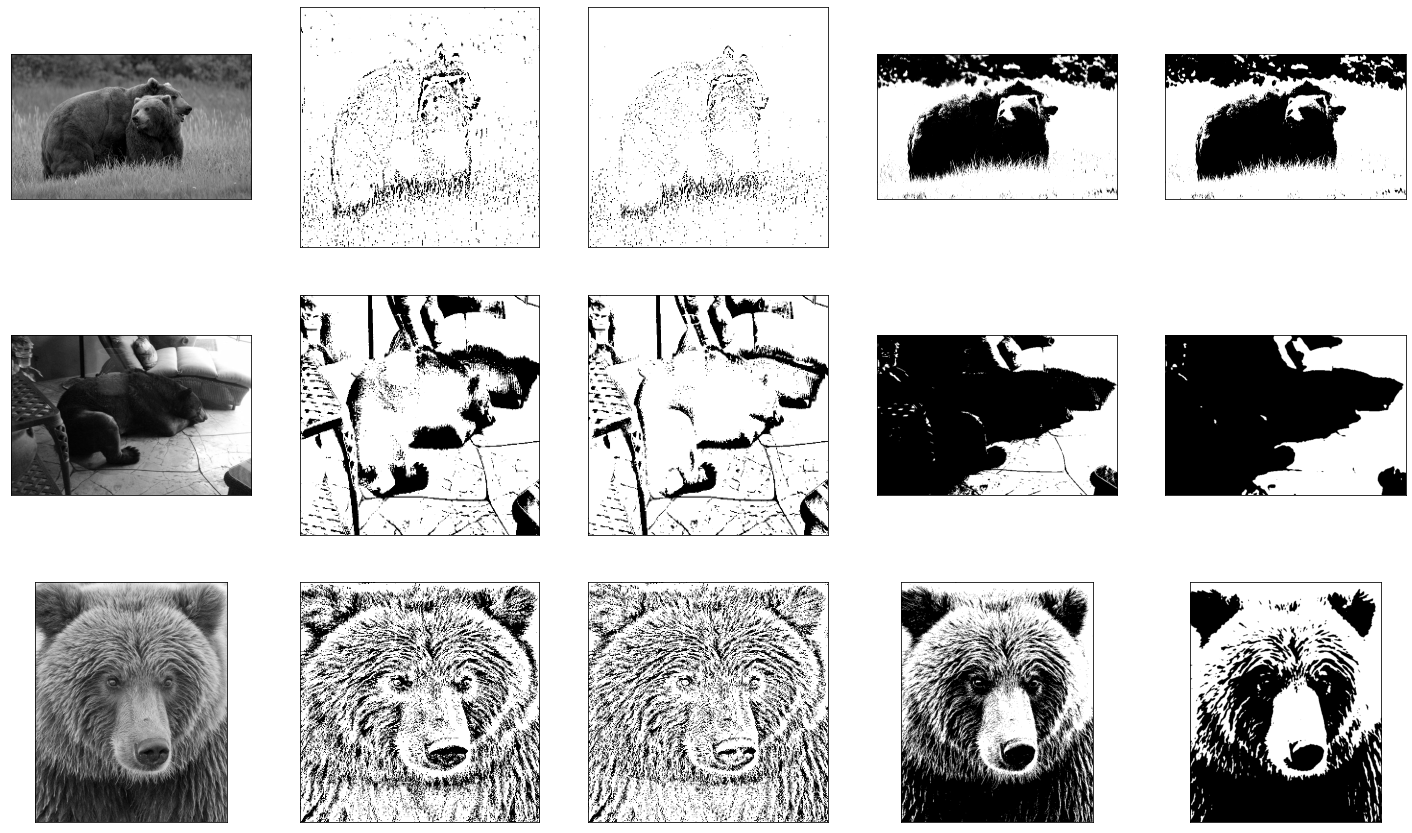

In [ ]:
def read_img(url):
  img = io.imread(url)
  img = img.astype(np.uint8)
  g_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  return g_img

def otsu(img):
  ret2,otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  blur = cv2.GaussianBlur(img,(11,11),0)
  ret3,g_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  return otsu, g_otsu


def threshold_img(img):
  thresh1 = cv2.resize(cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY,101, 20),(250,250))
  
  thresh2 = cv2.resize(cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 101, 20),(250,250))

  return thresh1, thresh2




def plot_img(count,img):
  ax = fig.add_subplot(3,5, count)
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)
  plt.imshow(img,"gray")


fig = plt.figure(figsize=(25,15))
count = 1

for url in [outdoor_img_url, indoor_img_url, close_img_url]:
  img = read_img(url)
  thresh1,thresh2 = threshold_img(img)
  otsu_img, g_otsu_img = otsu(img)
  plot_img(count,img)
  count += 1
  plot_img(count,thresh1)
  count += 1
  plot_img(count,thresh2)
  count += 1
  plot_img(count,otsu_img)
  count += 1
  plot_img(count, g_otsu_img)
  count += 1

  
